# Building a basic convolutional neural net
Once again we'll perform classification on the cat dataset. But this time we'll do it with a CNN, and compare the results to the simple fully connected network we were using before.

<img src="figures\basic_convNet.png" alt="A simple convolutional network" title="A simple convolutional network" width=600 />
<caption><center> **Figure 1**: A simple ConvNet <br> a "conv layer" is boxed in red</center></caption>
    
The convolution operation is an essential operation used in image processing, so it makes perfect sense that a convolutional neural network is often used to process images. However, application of ConvNets are not limited to image processing; we can also apply CNN to process other types of data, using either 1D or 3D convolution.

In [1]:
import pandas
import h5py
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from keras.utils import plot_model
import matplotlib.pyplot as plt
from cat_data_utils import *


### Load and explore dataset
Recall that the first dimension of the data should always be batch_size

In [2]:
# You should always explore your dataset. What are the feature dimensions? How many examples do you have?
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


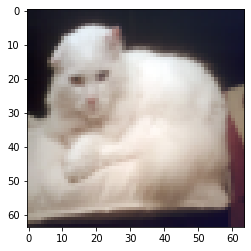

In [24]:
#Let's see what our images look like

index = 13
plt.imshow(train_x_orig[index,:])
#print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
# standardize dataset, and change to correct shape
train_x = train_x_orig/255.
test_x = test_x_orig/255.

train_y = train_y.T
test_y = test_y.T

print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(test_x.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 209
number of test examples = 50
X_train shape: (209, 64, 64, 3)
Y_train shape: (209, 1)
X_test shape: (50, 64, 64, 3)
Y_test shape: (50, 1)


### Build a CNN

In [7]:
def myModel(input_shape):
    """
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]

    Returns:
    model -- a Model() instance in Keras
    """
    # create the input layer
    X_input = Input(input_shape)
    
    # zero pad first
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    X = Dropout(0.25)(X)

    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    X = Dropout(0.25)(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    
    # this is the output layer
    X = Dense(1, activation='sigmoid', name='fc')(X) 
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

In [8]:
# pass in the dimensions of your training data, excluding the batch_number
model = myModel(train_x.shape[1:])

model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ["accuracy"])

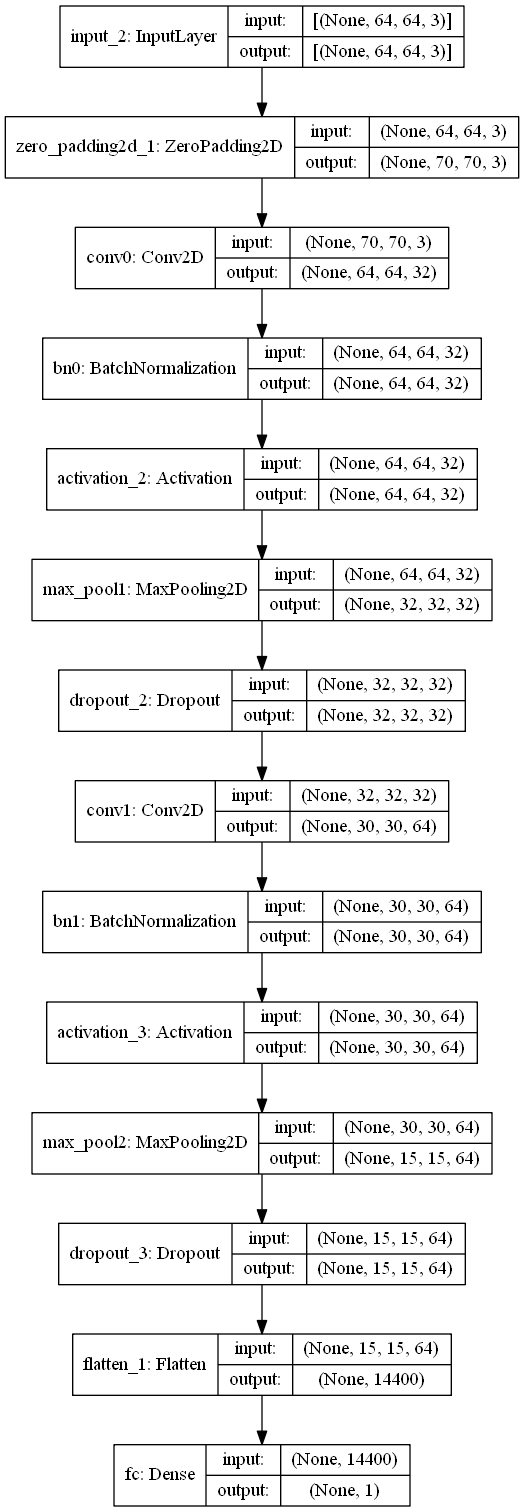

In [9]:
plot_model(model, to_file='HappyModel.png',show_shapes=True, show_layer_names=True)

In [13]:
training_history = model.fit(x = train_x, y = train_y, epochs = 40, batch_size = 16)

Epoch 1/40
14/14 [==============================] - 1s 63ms/step - loss: 0.0326 - accuracy: 0.9904
Epoch 2/40
14/14 [==============================] - 1s 73ms/step - loss: 0.0273 - accuracy: 0.9952
Epoch 3/40
14/14 [==============================] - 1s 63ms/step - loss: 0.0659 - accuracy: 0.9904
Epoch 4/40
14/14 [==============================] - 1s 69ms/step - loss: 0.4983 - accuracy: 0.8660
Epoch 5/40
14/14 [==============================] - 1s 66ms/step - loss: 0.2272 - accuracy: 0.9043
Epoch 6/40
14/14 [==============================] - 1s 64ms/step - loss: 0.2694 - accuracy: 0.9043
Epoch 7/40
14/14 [==============================] - 1s 65ms/step - loss: 0.2698 - accuracy: 0.8947
Epoch 8/40
14/14 [==============================] - 1s 64ms/step - loss: 0.5469 - accuracy: 0.8086
Epoch 9/40
14/14 [==============================] - 1s 63ms/step - loss: 0.4103 - accuracy: 0.8804
Epoch 10/40
14/14 [==============================] - 1s 67ms/step - loss: 0.1436 - accuracy: 0.9426
Epoch 11/

dict_keys(['loss', 'accuracy'])


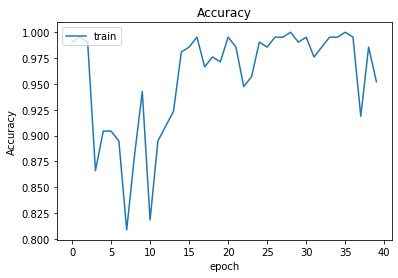

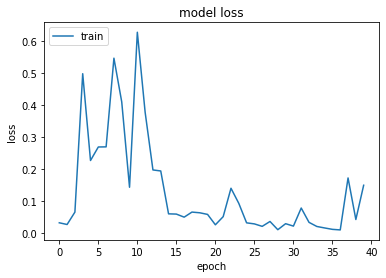

In [14]:
print(training_history.history.keys())
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
#plt.plot(training_history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
#plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [15]:
preds = model.evaluate(x = test_x, y = test_y)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 0s 18ms/step - loss: 1.4988 - accuracy: 0.7600

Loss = 1.4988290071487427
Test Accuracy = 0.7599999904632568


#### Tips for improving performance
* Use blocks of CONV->BATCHNORM->RELU such as:
    ```
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    ```
    until your height and width dimensions are quite low and your number of channels quite large (≈32 for example).
    You can then flatten the volume and use a fully-connected layer.
* Use MAXPOOL after such blocks. It will help you lower the dimension in height and width.
* Change your optimizer. We find 'adam' works well.
* If you get memory issues, lower your batch_size (e.g. 12 )
* Run more epochs until you see the train accuracy no longer improves.

## Wrapping up
Rather than initializing a model using `sqeuential()`, we 
* explicitly defined an input layer using `X_input = Input(input_shape)`, 
* one layer is passed onto the next with `X_next_layer = layer()(X_prev_layer)`, and 
* we explicitly defined a model by calling `model = Model(inputs = X_input, outputs = X_final_layer, name='my_model_name')`

This will enable us to build more complex models e.g., residual networks.